In [1]:
from local_tree_decomp import *
from help_functions import *

from local_hom_count_best import *

In [2]:
graph = graphs.CompleteBipartiteGraph(1, 2)
graph_clr = [0, 1, 1]

# target_graph = graphs.CompleteGraph(3)
# target_clr = [0, 1, 1]

target_graph = graphs.PathGraph(4)
target_clr = [0, 1, 1, 0]

# counter = GraphHomomorphismCounter(graph, target_graph)
# count = counter.count_homomorphisms_best()
# print(count)

colour_counter = GraphHomomorphismCounter(graph, target_graph, 2, graph_clr, target_clr, colourful=True)
colourful_count = colour_counter.count_homomorphisms_best()
print(colourful_count)


Node:  (6, {}) leaf

Node:  (5, {2}) intro
Colours:  Counter({1: 1}) Counter({0: 2, 1: 2}) [1]
actual target graph:  [0, 1]
mappings length:  2
intro vertex 2 and its index 0 in bag
intro node nbhs in bag:  []
INTRO child DP entry:  [1]
mapped:  0
mapped nbhs in target:  []
target vertex:  0
CURR with mapping:  0
intro color: 1, target color: 0
INVALID!
target vertex:  1
CURR with mapping:  0
intro color: 1, target color: 1
TEMP entry: [1, 0]

DP table:  [{}, {}, {}, {}, {}, [1, 0], [1]]

Node:  (4, {0, 2}) intro
Colours:  Counter({0: 1, 1: 1}) Counter({0: 2, 1: 2}) [0, 1]
actual target graph:  [0, 1, 2, 3]
mappings length:  16
intro vertex 0 and its index 0 in bag
intro node nbhs in bag:  [0]
INTRO child DP entry:  [1, 0]
mapped:  0
mapped nbhs in target:  [0]
target vertex:  0
CURR with mapping:  0
intro color: 0, target color: 0
TEMP entry: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

target vertex:  1
CURR with mapping:  1
intro color: 0, target color: 1
INVALID!
target verte

In [10]:
child_node_vtx_tuple = [2]
[vtx for vtx in child_node_vtx_tuple if graph.has_edge(graph.vertices()[0], vtx)]

[2]

In [ ]:
target_graph

In [8]:
graph = graphs.CompleteBipartiteGraph(1, 2)
random_graph = graphs.RandomGNP(20, 0.6, seed=42)

counter = GraphHomomorphismCounter(graph, random_graph)
count = counter.count_homomorphisms_best()
print(count)

# %prun counter.count_homomorphisms_best()


Node:  (6, {}) leaf

Node:  (5, {2}) intro
mapped:  0
mapped nbhs in target:  []
target vertex:  0
valid mapping:  0
updated mapping:  1
target vertex:  1
valid mapping:  1
updated mapping:  2
target vertex:  2
valid mapping:  2
updated mapping:  3
target vertex:  3
valid mapping:  3
updated mapping:  4
target vertex:  4
valid mapping:  4
updated mapping:  5
target vertex:  5
valid mapping:  5
updated mapping:  6
target vertex:  6
valid mapping:  6
updated mapping:  7
target vertex:  7
valid mapping:  7
updated mapping:  8
target vertex:  8
valid mapping:  8
updated mapping:  9
target vertex:  9
valid mapping:  9
updated mapping:  10
target vertex:  10
valid mapping:  10
updated mapping:  11
target vertex:  11
valid mapping:  11
updated mapping:  12
target vertex:  12
valid mapping:  12
updated mapping:  13
target vertex:  13
valid mapping:  13
updated mapping:  14
target vertex:  14
valid mapping:  14
updated mapping:  15
target vertex:  15
valid mapping:  15
updated mapping:  16
tar

In [ ]:
%load_ext line_profiler

from local_hom_count_best import count_homomorphisms_best

%lprun -f count_homomorphisms_best(graph, target_graph)

In [7]:
g = graph

tree_decomp = g.treewidth(certificate=True)
nice_tree_decomp = make_nice_tree_decomposition(g, tree_decomp)
root = sorted(nice_tree_decomp)[0]
dir_labelled_TD = label_nice_tree_decomposition(nice_tree_decomp, root, directed=True)

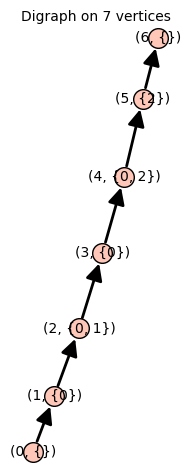

In [8]:
dir_labelled_TD

In [ ]:
node_changes(dir_labelled_TD)

In [ ]:
def best_speed_test(graph, target_graph, graph_clr, target_clr):
    # best_result = count_homomorphisms_best(graph, target_graph)
    # best_colour_result = count_homomorphisms_best_colour(graph, target_graph, graph_clr, target_clr)

    print('Best result:')
    %timeit count_homomorphisms_best(graph, target_graph, density_threshold=2)

    print('\nBest colour result:')
    %timeit count_homomorphisms_best(graph, target_graph, 2, graph_clr, target_clr, True)


In [ ]:
import random
random.seed(int(42))

graph = graphs.CompleteBipartiteGraph(1, 2)
# target_graph = graphs.CompleteGraph(3)

graph_clr = [0, 1, 1]
# target_clr = [0, 1, 2]

for i in range(1, 11):
    N = i * 10
    random_graph = graphs.RandomGNP(N, 0.5, seed=42)
    random_clr = [random.randint(0, 1) for _ in range(N)]
    print('N: ', N)
    best_speed_test(graph, random_graph, graph_clr, random_clr)
    print()

In [ ]:
import random

graph = graphs.CompleteBipartiteGraph(1, 3)
graph_clr = [0, 1, 1, 1]

target_graph = graphs.PetersenGraph()

max_num = 0

for _ in range(500):
    random_clr = [random.randint(0, 1) for _ in range(10)]
    num = count_homomorphisms_best(graph, target_graph, graph_clr, random_clr, colourful=True)
    if num > max_num:
        max_num = num

print(max_num)

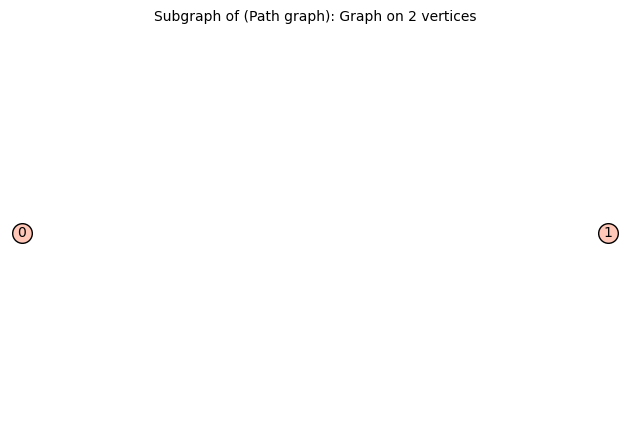

In [9]:
foo = target_graph.subgraph([0, 3])
foo.relabel(); foo

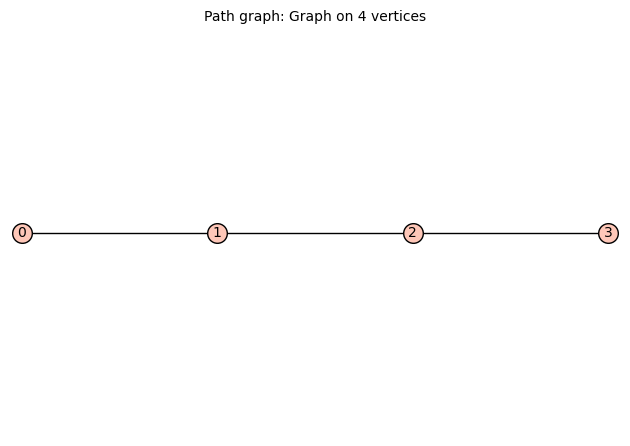

In [10]:
target_graph